In [1]:
import requests
import pprint
import random
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from babel import Locale
import json

## Scraping Data from MovieDB 

In [2]:
# API Key of MoviesDB Which I have stored in a Separate File for Privacy Reasons
# Should Register for API Service
file = open('Api_Variables.json')
api_var = json.loads(file.read())
api_key = api_var['api_key']
api_keyv4 = api_var['api_keyv4']


In [3]:
#API Specs
api_ver = 3
page_no = 1
base_url = f"https://api.themoviedb.org/{api_ver}"
path = f"/movie/top_rated"
endpoint = f"{base_url}{path}?api_key={api_key}&language=en-US&page={page_no}"
headers = {
    'Authorization': f'Bearer {api_keyv4}',
    'Content-Type': 'application/json;charset=utf-8'
}

In [4]:
Movies_Data = []
res = requests.get(endpoint)

In [5]:
# Total Pages of Results
total_pages = res.json()['total_pages']

In [6]:
# Sample Data
res.json()['results'][0]

{'adult': False,
 'backdrop_path': '/fQq1FWp1rC89xDrRMuyFJdFUdMd.jpg',
 'genre_ids': [10749, 35],
 'id': 761053,
 'original_language': 'en',
 'original_title': "Gabriel's Inferno Part III",
 'overview': "The final part of the film adaption of the erotic romance novel Gabriel's Inferno written by an anonymous Canadian author under the pen name Sylvain Reynard.",
 'popularity': 38.819,
 'poster_path': '/fYtHxTxlhzD4QWfEbrC1rypysSD.jpg',
 'release_date': '2020-11-19',
 'title': "Gabriel's Inferno Part III",
 'video': False,
 'vote_average': 8.9,
 'vote_count': 686}

In [7]:
# Extracting Individual Films from JSON Data from all the pages

for pg in range(1,total_pages+1):
    endpoint = f"{base_url}{path}?api_key={api_key}&language=en-US&page={pg}"
    res = requests.get(endpoint)
    for result in res.json()['results']:
        Movies_Data.append(result)
    
    

In [8]:
# Converting the Results to a DataFrame
df = pd.DataFrame(Movies_Data)

In [9]:
# Writing the Results to CSV
df.to_csv('Top_Movies.csv',index=False)

## Analysing the Number of Films by Language from the List of Top Movies

In [10]:
df_grouped = df.groupby(['original_language']).agg({'original_language':'count'})

In [11]:
df_grouped.columns = ['Number of Films']

In [12]:

df_grouped.reset_index(inplace=True)


In [13]:
df_grouped.head()

,original_language,Number of Films
0,af,1
1,ar,2
2,bn,1
3,bs,1
4,cn,44


In [14]:
df_grouped.columns = ['Language','Number of Films']

#### Getting the Actual Language from Language Code
#### A few does not have the language code in Babel, so those are manually validated

In [15]:
Lang_code = {}
Lang_code['cn'] = 'Chinese'
Lang_code['la'] = 'Latin'
Lang_code['no'] = 'Norwegian'

In [16]:
for i in df_grouped['Language']:
    if i not in ['cn','la','no']:
        Lang_code[i] = Locale(i).english_name

In [17]:
df_grouped.replace(Lang_code,inplace=True)

In [18]:
df_grouped.head()

,Language,Number of Films
0,Afrikaans,1
1,Arabic,2
2,Bangla,1
3,Bosnian,1
4,Chinese,44


In [19]:
sns.set(rc={'figure.figsize':(40,35)})
pal = sns.color_palette("Blues_d", len(df_grouped['Number of Films']))
rank = df_grouped['Number of Films'].argsort().argsort()

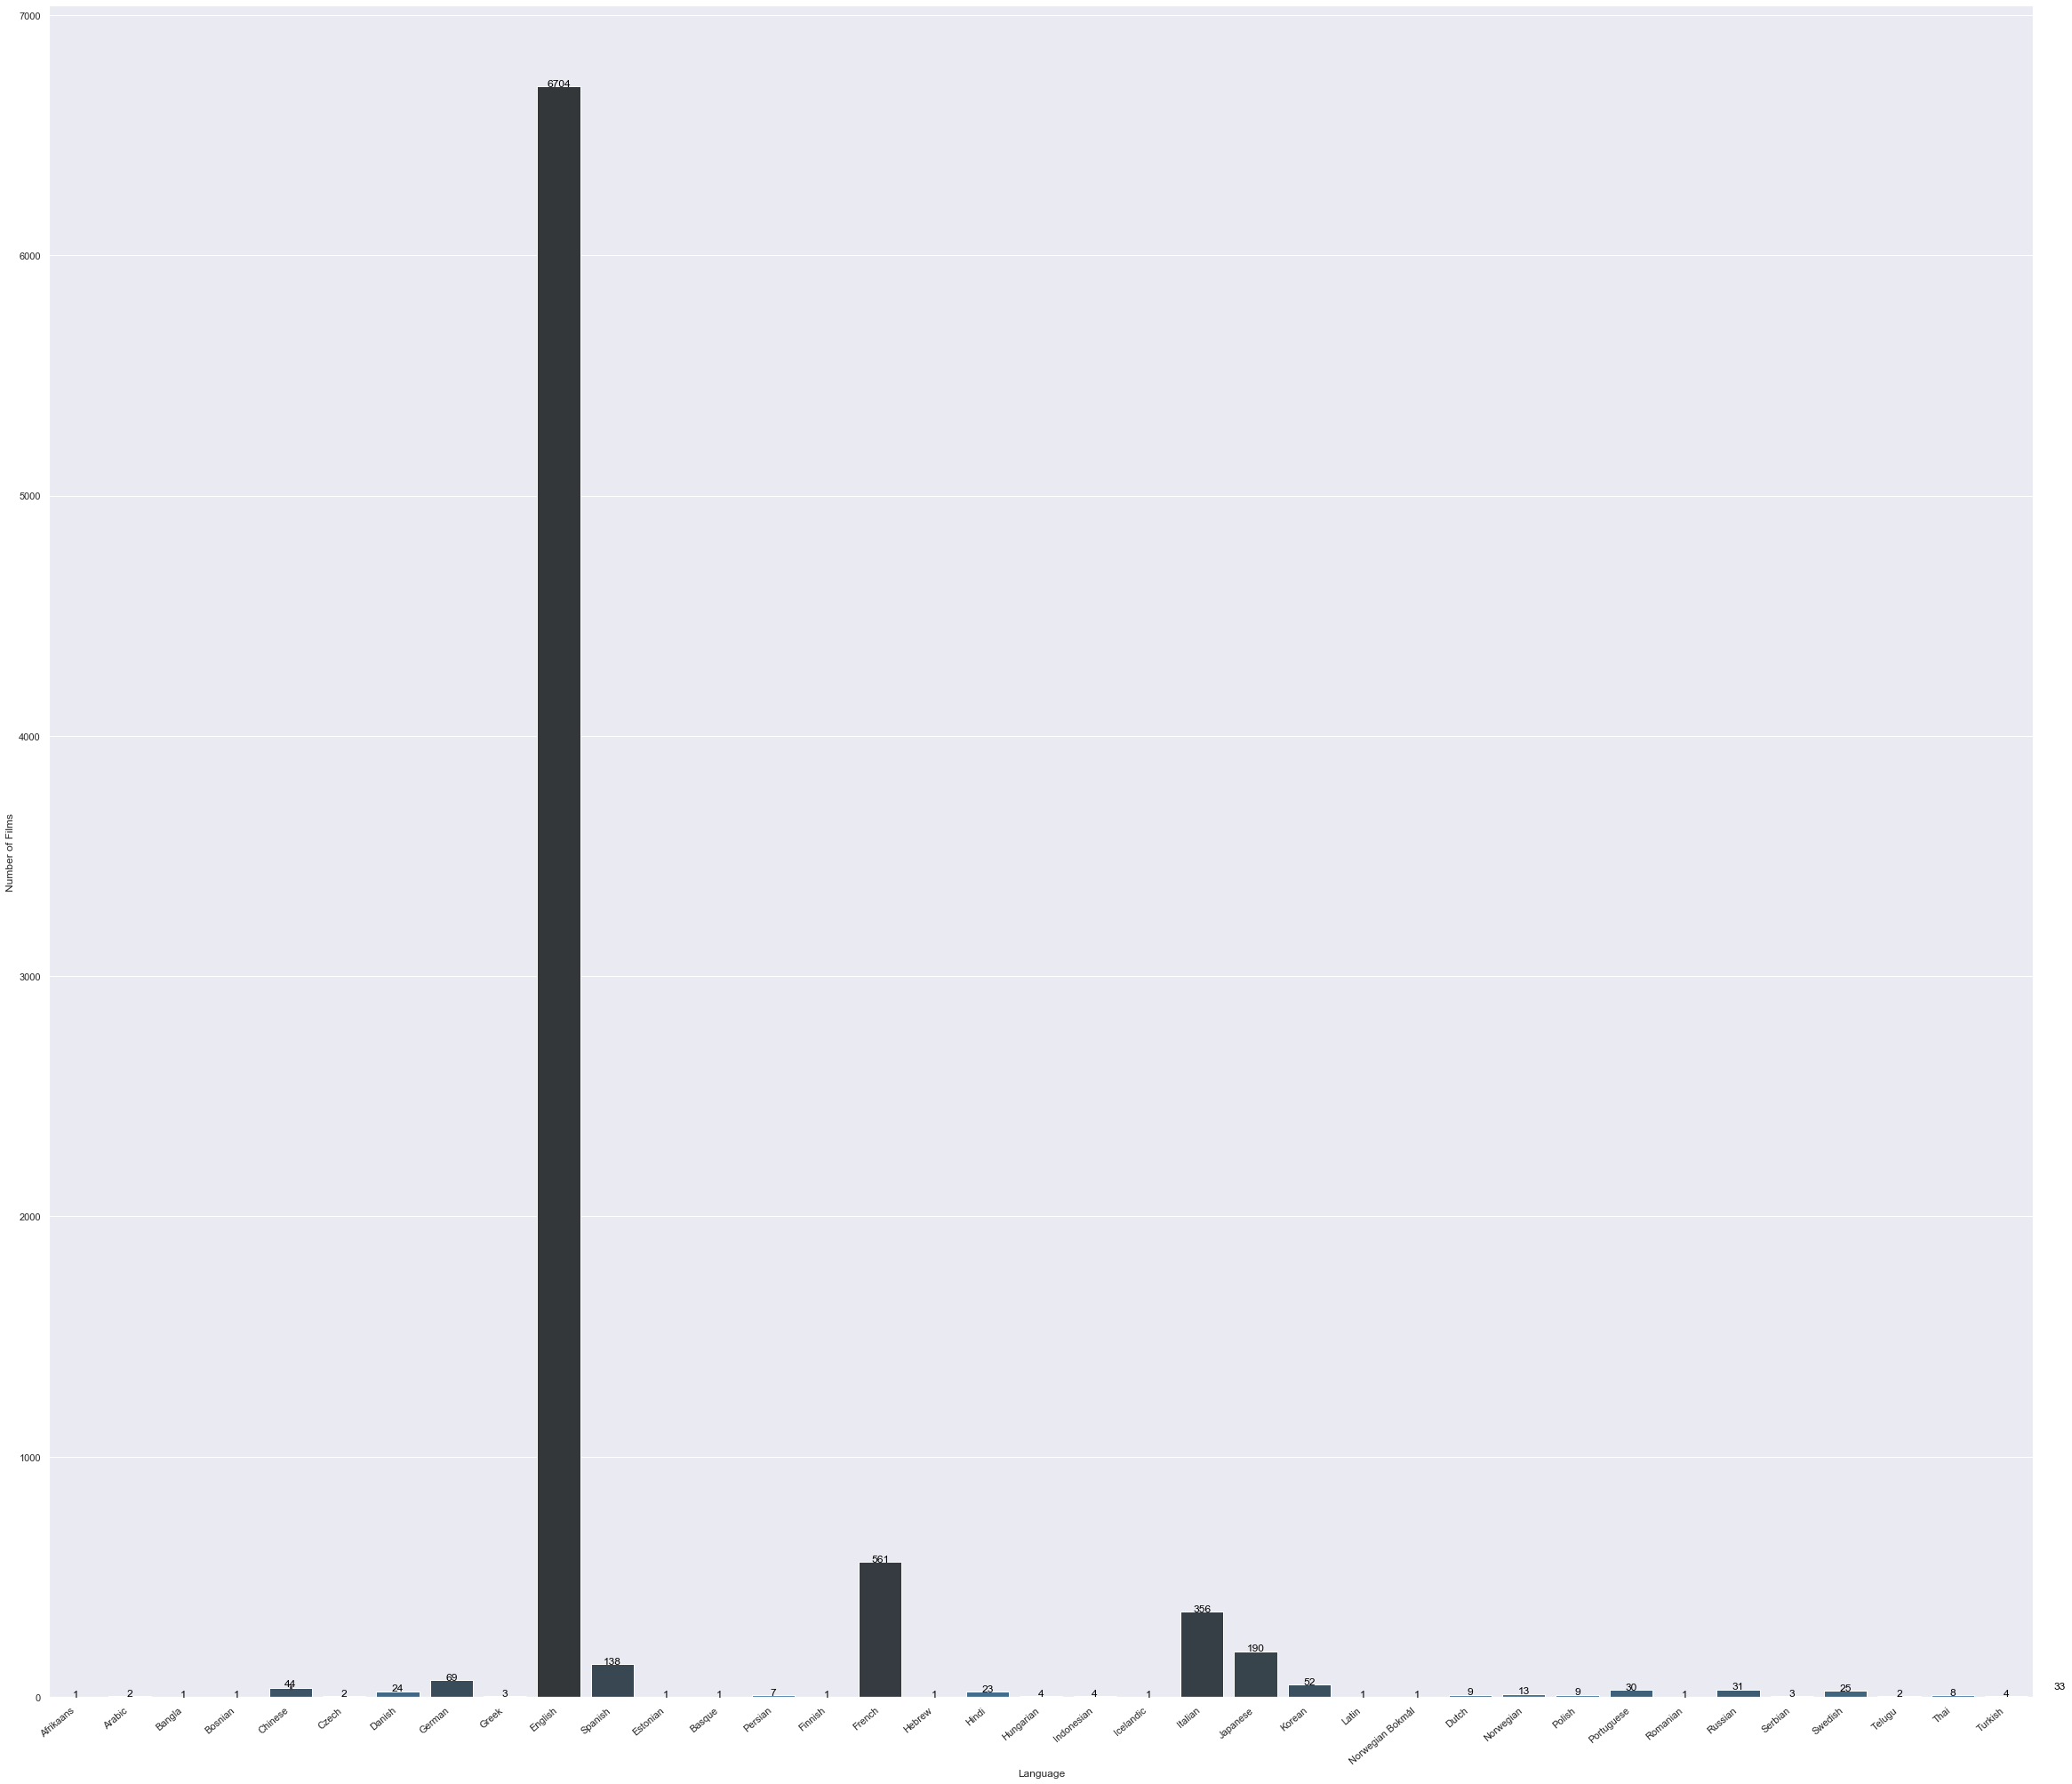

In [20]:
g = sns.barplot(x="Language",y="Number of Films",data=df_grouped,palette=np.array(pal[::-1])[rank])
g.set_xticklabels(g.get_xticklabels(),rotation=40,ha="right")
for index, row in df_grouped.iterrows():
    g.text(row.name,row['Number of Films'], round(row['Number of Films'],2), color='black', ha="center")

In [21]:
g.figure.savefig("output.png")